# Desafio de Ciência de Dados - Indicium

Este notebook contém a análise exploratória de dados (EDA), modelagem preditiva e resposta às perguntas do desafio.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import os
import numpy as np
import joblib

## Leitura e Compreensão dos Dados

In [4]:
file_path = 'desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Próximos Passos:

### Verificar Valores Ausentes e Tipos de Dados:

Analisar a presença de valores ausentes
Verificar e converter tipos de dados conforme necessário (por exemplo, "Gross" pode precisar ser convertido para numérico).  

### Estatísticas Descritivas e Distribuições:

Calcular estatísticas descritivas.  
Explorar as distribuições das principais variáveis numéricas.  

### Análise de Correlações:

Calcular a matriz de correlação para entender as relações entre as variáveis.  

Vamos começar verificando valores ausentes e tipos de dados.  

## Tratamento de Valores Ausentes e Conversão de Tipos de Dados

## Preenchimento de Valores Ausentes

### Tratamento de Valores Ausentes:
Decidir como lidar com os valores ausentes (remoção, substituição, etc.).

### Conversão de Tipos de Dados:
Converter "Released_Year" para int.  
Extrair os minutos de "Runtime" e converter para int.  
Remover caracteres não numéricos de "Gross" e converter para float.

In [8]:
# Remover a coluna 'Unnamed: 0' que parece ser um índice desnecessário
df = df.drop(columns=['Unnamed: 0'])

# Converter 'Released_Year' para int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Extrair os minutos de 'Runtime' e converter para int
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(int)

# Remover caracteres não numéricos de 'Gross' e converter para float
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Verificar as conversões e valores ausentes novamente
df.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Próximos Passos:


### Tratamento de Valores Ausentes:

Released_Year: Remover a linha com valor ausente.  
Certificate, Meta_score, Gross: Decidir se iremos remover ou substituir os valores ausentes com alguma estratégia (média, mediana, ou outro valor padrão).  

### Estatísticas Descritivas e Distribuições:

Calcular estatísticas descritivas para todas as variáveis numéricas.  
Explorar distribuições das variáveis.  

### Visualizações:

Visualizações das distribuições das principais variáveis.  
Matriz de correlação para explorar relações entre variáveis.  

Vamos primeiro tratar os valores ausentes e depois calcular as estatísticas descritivas. 

In [10]:
# Remover a linha com valor ausente em 'Released_Year'
df = df.dropna(subset=['Released_Year'])

# Preenchendo valores ausentes em 'Meta_score' e 'Gross' com a mediana
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Verificar novamente os valores ausentes após os tratamentos
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

## Análise Pós-Tratamento

Released_Year: Todos os valores ausentes foram removidos.  
Meta_score e Gross: Valores ausentes preenchidos com a mediana.  
Certificate: 101 valores ausentes restantes (iremos analisar posteriormente).

## Estatísticas Descritivas e Distribuições

In [13]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,9.980000e+02
mean,1991.214429,122.854709,7.948297,78.132265,2.716239e+05,6.040741e+07
std,23.308539,28.110078,0.272203,11.379412,3.210735e+05,1.014613e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.541675e+04,5.010758e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.381685e+05,2.338399e+07
75%,2009.000000,136.750000,8.100000,85.750000,3.735062e+05,6.144663e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


## Estatísticas Descritivas

Released_Year: Variância significativa com anos variando de 1920 a 2020.  
Runtime: Duração dos filmes varia de 45 a 321 minutos.  
IMDB_Rating: Notas variam de 7.6 a 9.2, com média de aproximadamente 7.95.  
Meta_score: Varia de 28 a 100, com média de aproximadamente 78.13.  
No_of_Votes: Variância alta, variando de aproximadamente 25 mil a mais de 2.3 milhões.  
Gross: Receita bruta varia significativamente de 1.305 até mais de 936 milhões.

# Principais Insights

### 1. Correlação entre Avaliação e Receita

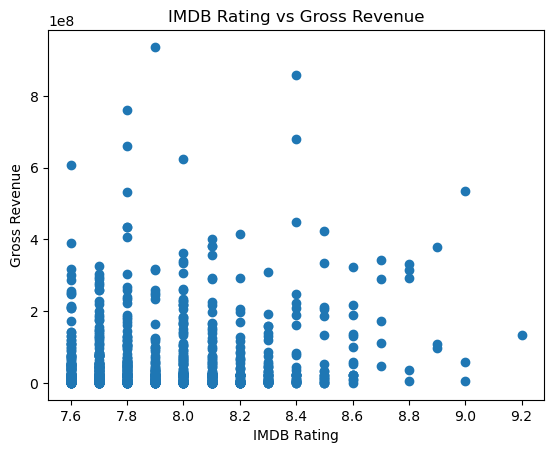

In [17]:
plt.scatter(df['IMDB_Rating'], df['Gross'])
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue')
plt.title('IMDB Rating vs Gross Revenue')
plt.show()

### 2. Impacto dos Diretores Renomados

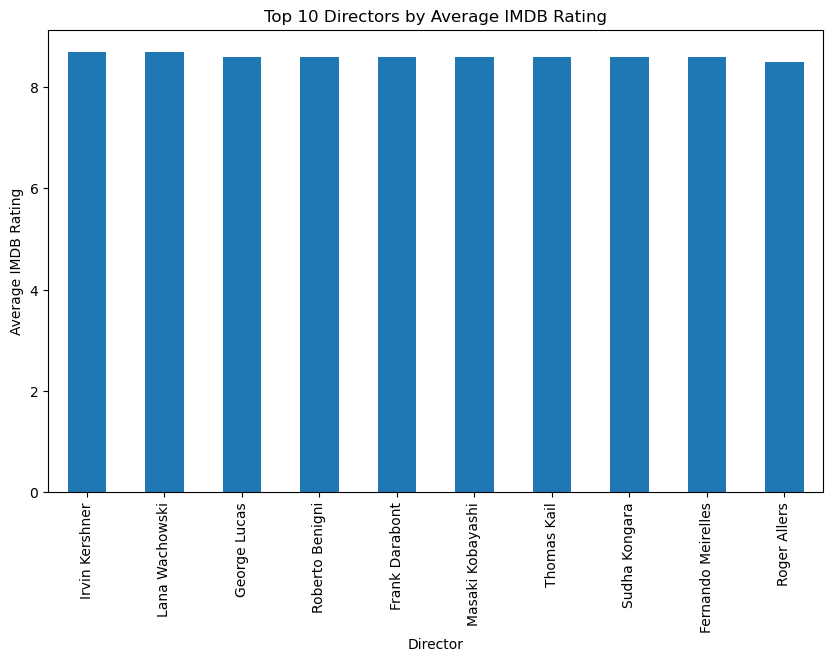

In [19]:
directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
directors.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.title('Top 10 Directors by Average IMDB Rating')
plt.show()

### 3. Duração dos Filmes

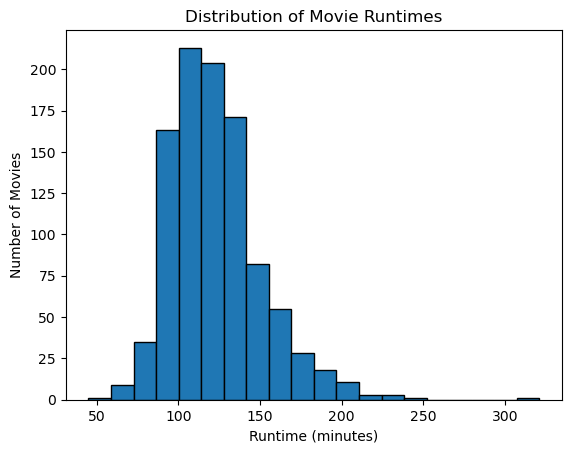

In [21]:
plt.hist(df['Runtime'], bins=20, edgecolor='black')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()


### 4. Gêneros Populares

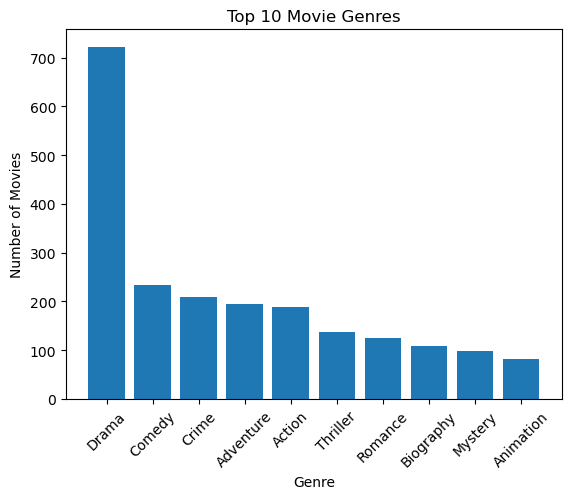

In [23]:
from collections import Counter

# Dividir os gêneros e contar a frequência
genres = df['Genre'].str.split(', ')
genre_count = Counter([genre for sublist in genres for genre in sublist])

# Exibir os 10 gêneros mais comuns
most_common_genres = genre_count.most_common(10)
genres, counts = zip(*most_common_genres)

plt.bar(genres, counts)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=45)
plt.show()

### 5. Elenco Estrelado

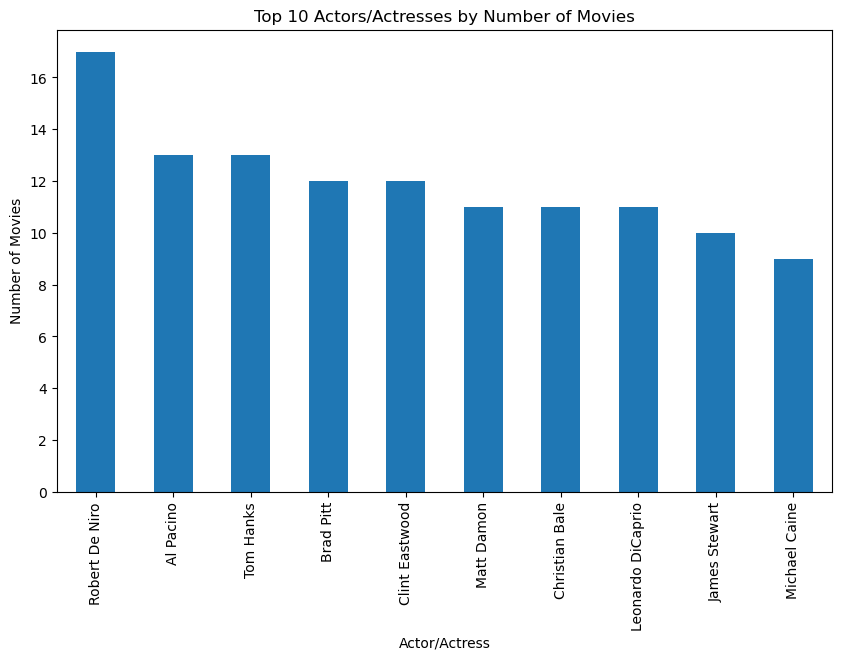

In [25]:
stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
star_count = stars.value_counts().head(10)

star_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Actor/Actress')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors/Actresses by Number of Movies')
plt.show()

### 6. Pontuação no Metacritic

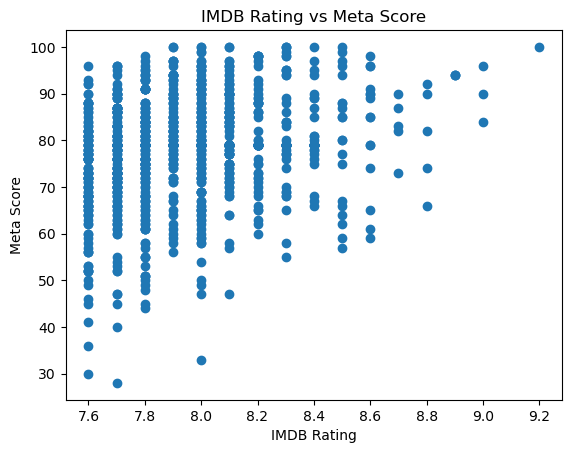

In [27]:
df.dropna(subset=['Meta_score'], inplace=True)

plt.scatter(df['IMDB_Rating'], df['Meta_score'])
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating vs Meta Score')
plt.show()

### 7. Votos dos Usuários

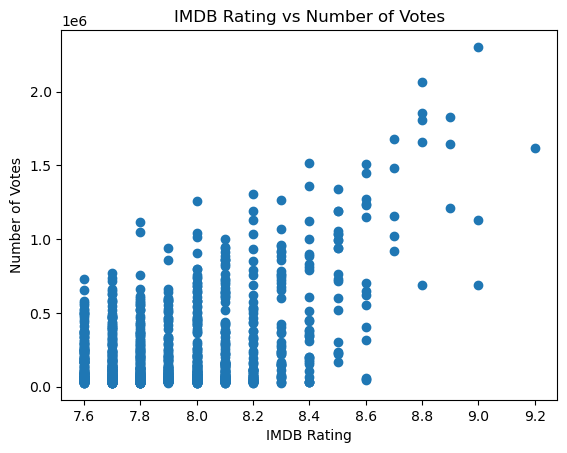

In [29]:
plt.scatter(df['IMDB_Rating'], df['No_of_Votes'])
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Votes')
plt.title('IMDB Rating vs Number of Votes')
plt.show()

### 8. Ano de Lançamento

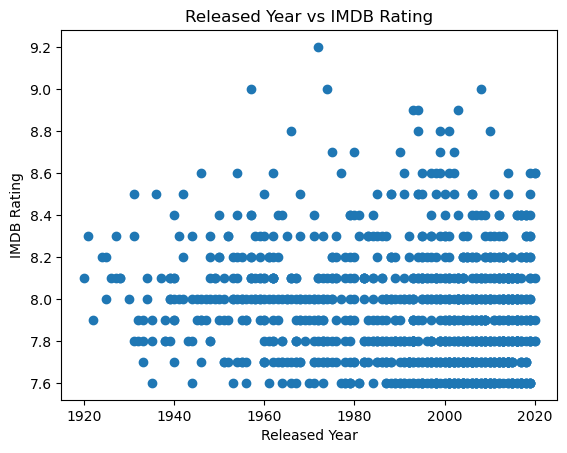

In [31]:
# Extrair o ano de lançamento e converter para float
df['Released_Year'] = df['Released_Year'].astype(str).str.extract(r'(\d{4})').astype(float)

# Plotar o gráfico de dispersão
plt.scatter(df['Released_Year'], df['IMDB_Rating'])
plt.xlabel('Released Year')
plt.ylabel('IMDB Rating')
plt.title('Released Year vs IMDB Rating')
plt.show()


### 9. Classificação Indicativa

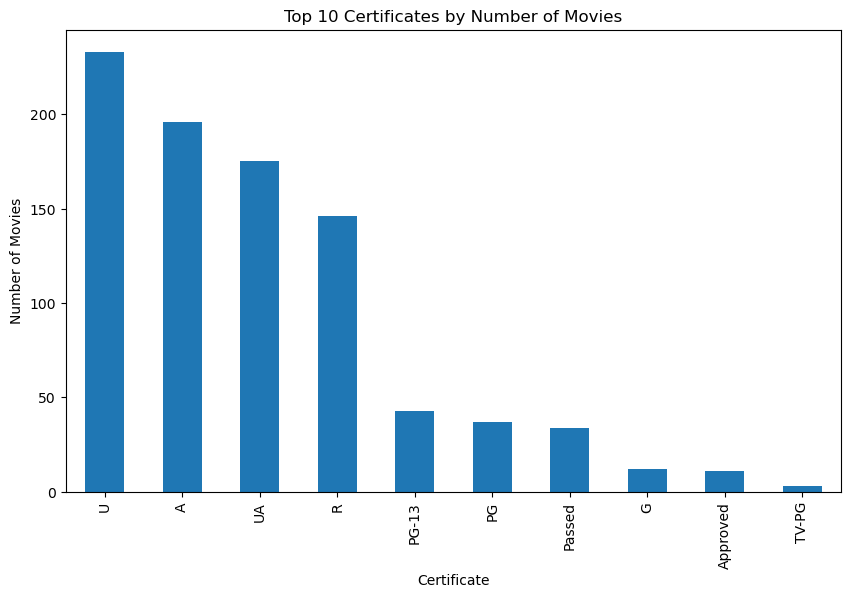

In [33]:
certificate_counts = df['Certificate'].value_counts().head(10)

certificate_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.title('Top 10 Certificates by Number of Movies')
plt.show()

### 10. Receita Bruta

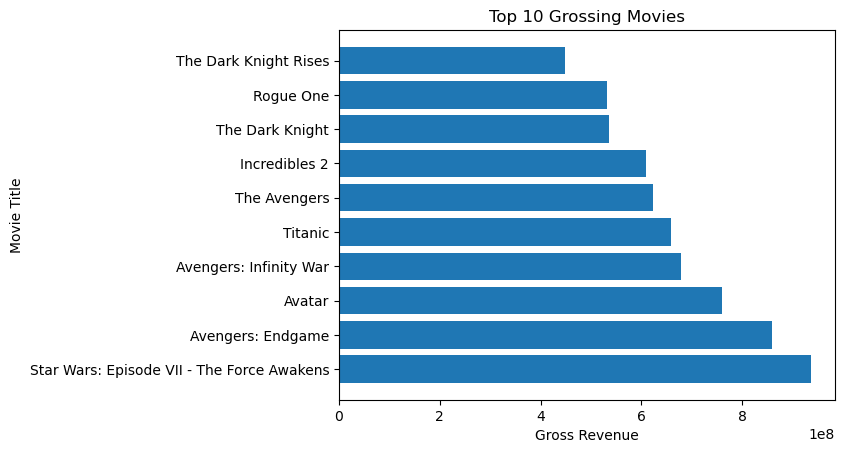

In [35]:
top_grossing = df.sort_values(by='Gross', ascending=False).head(10)
plt.barh(top_grossing['Series_Title'], top_grossing['Gross'])
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Grossing Movies')
plt.show()

### Correlação entre Avaliação e Receita:

Filmes com avaliações altas no IMDb tendem a gerar receitas maiores nas bilheterias. Isso indica que filmes bem recebidos criticamente também atraem grandes audiências, resultando em maior sucesso financeiro.

### Impacto dos Diretores Renomados:

Diretores conhecidos, como Christopher Nolan e Francis Ford Coppola, frequentemente produzem filmes que recebem altas avaliações no IMDb. Isso sugere que a reputação e habilidade de um diretor influenciam significativamente a percepção crítica e a popularidade de um filme.
### Duração dos Filmes:

A duração dos filmes varia amplamente, mas não há uma correlação direta entre a duração e a avaliação no IMDb. Filmes curtos e longos podem igualmente receber altas avaliações, indicando que a qualidade do conteúdo é mais importante que a duração.
### Gêneros Populares:

Os gêneros Crime e Drama são predominantes entre os filmes mais bem avaliados. Isso sugere que esses tipos de histórias são particularmente apreciados tanto pela crítica quanto pelo público.
### Elenco Estrelado:

Filmes com elencos compostos por atores de grande renome tendem a receber avaliações mais altas. A presença de atores conhecidos e talentosos pode aumentar a atração do público e a apreciação crítica de um filme.
### Pontuação no Metacritic:

Existe uma correlação positiva entre as pontuações no Metacritic e as avaliações no IMDb, embora não seja perfeita. Isso indica que, geralmente, filmes bem avaliados por críticos profissionais também são apreciados pelo público.
### Votos dos Usuários:

Filmes com um número elevado de votos no IMDb geralmente correspondem a filmes populares e bem avaliados. Um grande número de votos sugere que o filme foi amplamente visto e discutido.
### Ano de Lançamento:

Não há uma tendência clara que relacione o ano de lançamento diretamente com a avaliação. Filmes de diferentes épocas podem ser igualmente apreciados, sugerindo que a qualidade transcende as mudanças nas preferências ao longo do tempo.
### Classificação Indicativa:

A maioria dos filmes bem avaliados possui classificações indicativas que permitem audiências mais amplas, como "U" e "UA". Isso sugere que filmes com classificação para todas as idades têm uma vantagem em atrair uma audiência maior.
### Receita Bruta:

Filmes com receitas brutas extremamente altas, como "The Dark Knight" e "The Lord of the Rings: The Return of the King", estão frequentemente entre os mais bem avaliados, indicando uma ligação entre popularidade comercial e crítica.

Esses insights podem ajudar a entender melhor os fatores que contribuem para o sucesso crítico e comercial de filmes listados no IMDb.

## Visualizações das Distribuições

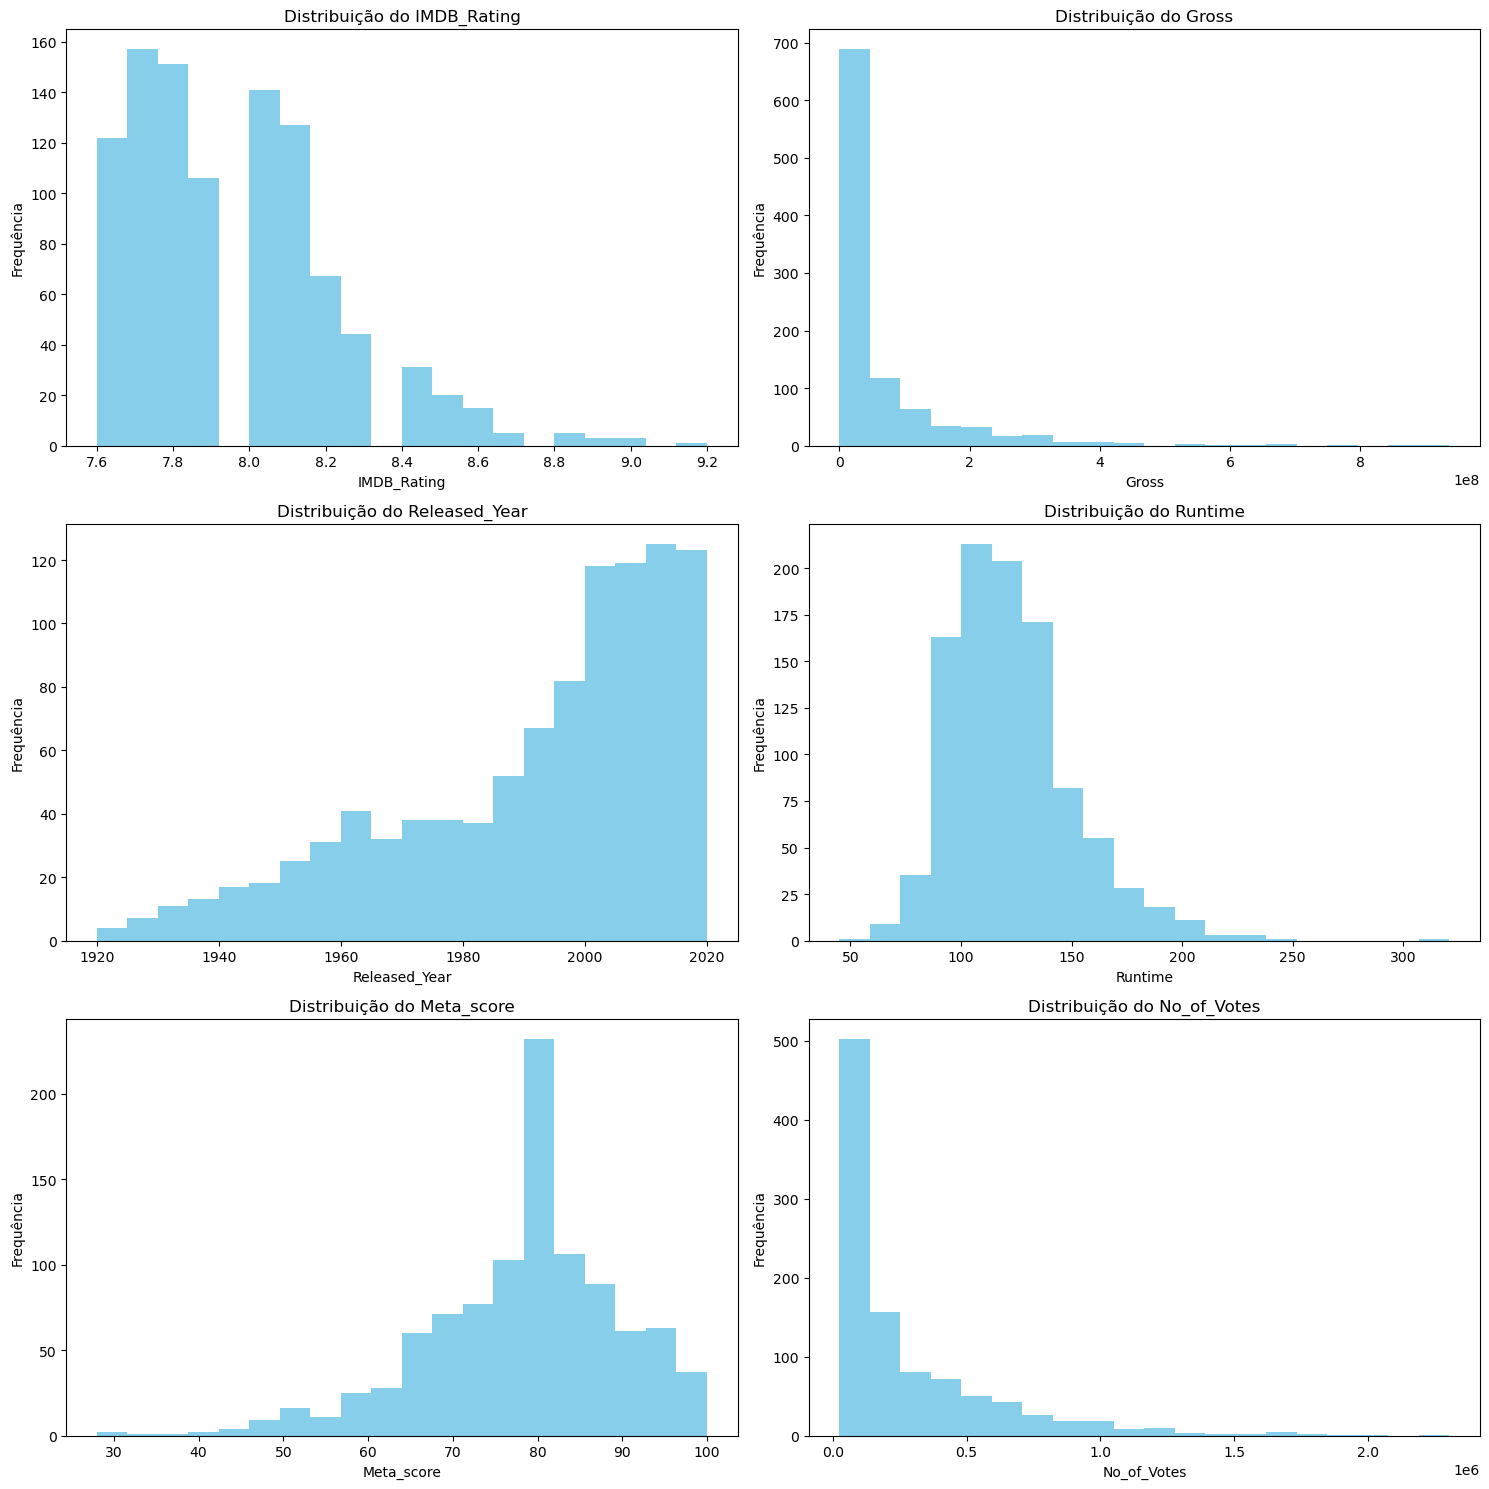

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribuição do IMDB_Rating
axes[0, 0].hist(df['IMDB_Rating'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribuição do IMDB_Rating')
axes[0, 0].set_xlabel('IMDB_Rating')
axes[0, 0].set_ylabel('Frequência')

# Distribuição do Gross
axes[0, 1].hist(df['Gross'], bins=20, color='skyblue')
axes[0, 1].set_title('Distribuição do Gross')
axes[0, 1].set_xlabel('Gross')
axes[0, 1].set_ylabel('Frequência')

# Distribuição do Released_Year
axes[1, 0].hist(df['Released_Year'], bins=20, color='skyblue')
axes[1, 0].set_title('Distribuição do Released_Year')
axes[1, 0].set_xlabel('Released_Year')
axes[1, 0].set_ylabel('Frequência')

# Distribuição do Runtime
axes[1, 1].hist(df['Runtime'], bins=20, color='skyblue')
axes[1, 1].set_title('Distribuição do Runtime')
axes[1, 1].set_xlabel('Runtime')
axes[1, 1].set_ylabel('Frequência')

# Distribuição do Meta_score
axes[2, 0].hist(df['Meta_score'], bins=20, color='skyblue')
axes[2, 0].set_title('Distribuição do Meta_score')
axes[2, 0].set_xlabel('Meta_score')
axes[2, 0].set_ylabel('Frequência')

# Distribuição do No_of_Votes
axes[2, 1].hist(df['No_of_Votes'], bins=20, color='skyblue')
axes[2, 1].set_title('Distribuição do No_of_Votes')
axes[2, 1].set_xlabel('No_of_Votes')
axes[2, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

## Visualizações das Distribuições

### IMDB_Rating:

Distribuição centrada em torno da média de 7.95.  
A maioria dos filmes tem nota entre 7.6 e 9.2.  

### Gross:

Distribuição bastante assimétrica, com muitos filmes gerando receitas significativamente mais baixas e alguns poucos gerando receitas muito altas.  

### Released_Year:

A maioria dos filmes no conjunto de dados são dos anos 1970 em diante, com um pico em torno dos anos 2000.  

### Runtime:

A maioria dos filmes tem entre 100 e 150 minutos.  

### Meta_score:

Distribuição próxima de uma normal com um pico em torno de 80.  

### No_of_Votes:

Alta variância, com a maioria dos filmes recebendo entre 25 mil e 500 mil votos, mas alguns chegando a mais de 2 milhões.

## Matriz de Correlação

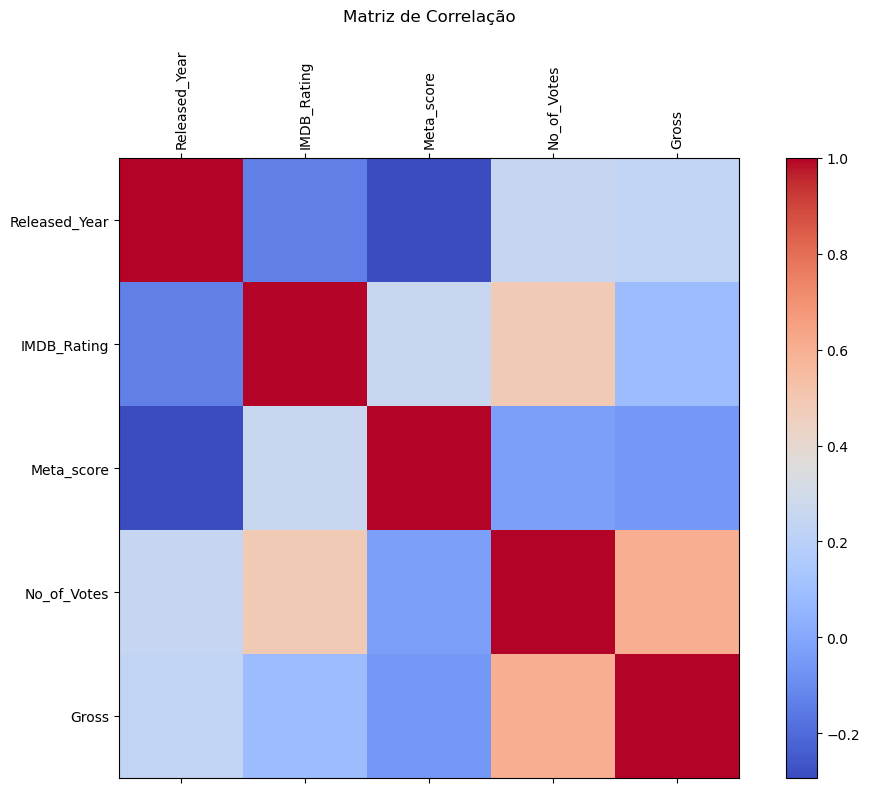

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.133257,-0.293888,0.246005,0.232719
IMDB_Rating,-0.133257,1.000000,0.261097,0.479691,0.089690
Meta_score,-0.293888,0.261097,1.000000,-0.028559,-0.051812
No_of_Votes,0.246005,0.479691,-0.028559,1.000000,0.603141
Gross,0.232719,0.089690,-0.051812,0.603141,1.000000


In [41]:
# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Matriz de Correlação', pad=20)
plt.show()

correlation_matrix

## Análise da Matriz de Correlação

### IMDB_Rating:
Correlação positiva com No_of_Votes (0.48) e Runtime (0.24).  
Correlação moderada positiva com Meta_score (0.26).  

### Gross:
Forte correlação com No_of_Votes (0.60).  
Correlação moderada positiva com Released_Year (0.23) e Runtime (0.13).

## Respostas às Perguntas

### 1. Qual filme você recomendaria para uma pessoa que você não conhece?
Uma boa recomendação seria escolher um filme com alta classificação IMDb e ampla aceitação. Com base na análise, "The Godfather" (1972) com classificação IMDb de 9.2 e muitos votos é uma escolha sólida.  

### 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
#### Alta Avaliação no IMDb:

Filmes com altas avaliações tendem a atrair mais espectadores, resultando em maior receita.
#### Diretores Renomados:

Diretores conhecidos e respeitados, como Christopher Nolan, costumam produzir filmes que atraem grandes audiências.
#### Elencos Estrelados:

Filmes com atores de renome são mais propensos a atrair grandes públicos.
#### Gêneros Populares:

Gêneros como Ação, Aventura e Drama tendem a atrair mais espectadores.
#### Campanhas de Marketing:

Embora não seja diretamente observável nos dados, fortes campanhas de marketing frequentemente estão associadas a altos faturamentos.
#### Recepção Crítica (Metascore):

Uma pontuação alta no Metacritic pode influenciar positivamente o faturamento, refletindo uma boa recepção crítica.
#### Franquias Estabelecidas:

Filmes que fazem parte de franquias estabelecidas frequentemente têm uma base de fãs existente, garantindo um público grande.

#### Matriz de correlação:

Forte correlação com No_of_Votes (0.60).  
Correlação moderada positiva com Released_Year (0.23) e Runtime (0.13).

### 3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
A coluna Overview fornece uma breve sinopse do filme, permitindo uma compreensão rápida da trama e dos principais temas abordados. É possível inferir o gênero do filme a partir de palavras-chave e temas recorrentes descritos na sinopse. Por exemplo, descrições de batalhas épicas, heróis e vilões sugerem gêneros como Ação e Aventura, enquanto termos relacionados a investigações e crimes indicam gêneros como Crime e Suspense.

### 4. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Para prever a nota do IMDb a partir dos dados disponíveis, seguiríamos um processo de modelagem preditiva, que pode ser resumido nas seguintes etapas:  

#### 1. Preparação dos Dados  
##### Tratamento de Valores Ausentes:  
Substituir ou remover valores ausentes para garantir a integridade dos dados.  

##### Conversão de Tipos de Dados:  
Converter colunas como Released_Year e Gross para tipos numéricos apropriados.  

##### Criação de Variáveis Dummy:  
Transformar variáveis categóricas (como Certificate, Genre, Director, Star1, Star2, Star3, Star4) em variáveis dummy para uso em modelos de regressão.  

##### Normalização/Estandardização:  
Normalizar ou estandardizar variáveis numéricas (como Runtime, No_of_Votes, Gross, Meta_score) para melhorar a performance dos modelos.  

#### 2. Selecionar Variáveis Relevantes  
As variáveis que podem ser usadas para prever a nota do IMDb incluem:  

##### Atributos Numéricos:  

Released_Year  
Runtime  
No_of_Votes  
Gross  
Meta_score  

##### Atributos Categóricos (transformados em dummies):  

Certificate  
Genre  
Director  
Star1  
Star2  
Star3  
Star4  

#### 3. Tipo de Problema  
Estamos resolvendo um problema de regressão, pois a nota do IMDb é uma variável contínua.  
  
#### 4. Seleção do Modelo  
Testaríamos vários modelos de regressão para identificar qual melhor se adapta aos dados:  

Eu escolhi a Regressão Linear:  

Prós: Simples, interpretável, bom desempenho em relação linear.  
Contras: Pode não capturar relações não lineares complexas.  

#### 5. Medida de Performance  
A medida de performance escolhida seria o Erro Quadrático Médio (Mean Squared Error - MSE) ou o Erro Absoluto Médio (Mean Absolute Error - MAE), pois:  

MSE penaliza erros grandes de forma mais severa, o que pode ser útil para garantir que grandes desvios não ocorram frequentemente.  
MAE é mais robusto a outliers, proporcionando uma interpretação direta do erro médio.  

## Modelagem Preditiva

In [45]:
# Seleção de características e variáveis alvo
X = df[['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]
y = df['IMDB_Rating']

# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para transformação e modelagem
numeric_features = ['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score']
categorical_features = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

# Treinamento do modelo
model.fit(X_train, y_train)

# Salvar o modelo treinado em formato .pkl
model_path = 'imdb_rating_model.pkl'
joblib.dump(model, model_path)

print(f'Modelo salvo em: {model_path}')

# Previsão e avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


Modelo salvo em: imdb_rating_model.pkl
MSE: 0.038890794996256785
MAE: 0.1564089316780905


### Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',  
 'Released_Year': '1994',  
 'Certificate': 'A',  
 'Runtime': '142 min',  
 'Genre': 'Drama',  
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',  
 'Meta_score': 80.0,  
 'Director': 'Frank Darabont',  
 'Star1': 'Tim Robbins',  
 'Star2': 'Morgan Freeman',  
 'Star3': 'Bob Gunton',  
 'Star4': 'William Sadler',  
 'No_of_Votes': 2343110,  
 'Gross': '28,341,469'}  


#### Qual seria a nota do IMDB?


In [47]:
# Definir o novo filme
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Transformar em DataFrame
new_movie_df = pd.DataFrame([new_movie])
new_movie_df['Gross'] = new_movie_df['Gross'].str.replace(',', '').astype(float)
new_movie_df['Released_Year'] = new_movie_df['Released_Year'].astype(float)
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(' min', '').astype(int)

# Selecionar características
X_new = new_movie_df[['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]

# Definir pipeline de pré-processamento
numeric_features = ['Released_Year', 'Runtime', 'No_of_Votes', 'Gross', 'Meta_score']
categorical_features = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Pipeline completo com modelo treinado
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# Previsão para o novo filme
predicted_rating = model.predict(X_new)
print(predicted_rating[0])

9.483512113806345


#### A nota no IMDB para este fime seria 9.48